In [2]:
import numpy as np
import pandas as pd

## Introduction
This is the notebook for Kai's time series analysis

In [116]:
Series = pd.read_csv('TimeSeriesData.csv')
Series.head()
print(len(Series))

4183


In [117]:
Series = Series.drop('Unnamed: 0', axis = 1)
Series

,SeasonId,RoundId,PositionId,Points,MatchId
0,2019,1,59.0,2.0,19111015
1,2019,1,56.0,2.0,19111015
2,2019,1,61.0,4.0,19111015
3,2019,1,56.0,2.0,19111015
4,2019,1,64.0,4.0,19111015
...,...,...,...,...,...
4178,2021,25,53.0,4.0,21111256
4179,2021,25,59.0,2.0,21111256
4180,2021,25,53.0,4.0,21111256
4181,2021,25,57.0,4.0,21111256


In [118]:
i = 0
for i in range(len(Series)):
    if Series['SeasonId'][i] == 2020:
        Series['RoundId'][i] = Series['RoundId'][i] + 29
    elif Series['SeasonId'][i] == 2021:
        Series['RoundId'][i] = Series['RoundId'][i] + 54

<ipython-input-118-0f29835e4301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series['RoundId'][i] = Series['RoundId'][i] + 29
<ipython-input-118-0f29835e4301>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series['RoundId'][i] = Series['RoundId'][i] + 54


In [119]:
t = Series.groupby(['RoundId', 'PositionId']).agg(lambda X: sum(X))
t = t.drop(['MatchId', 'SeasonId'], axis = 1)
t = t.reset_index()
t

,RoundId,PositionId,Points
0,1,54.0,4.0
1,1,56.0,8.0
2,1,59.0,2.0
3,1,61.0,8.0
4,1,64.0,4.0
...,...,...,...
824,79,59.0,28.0
825,79,61.0,12.0
826,79,63.0,4.0
827,79,65.0,4.0


In [126]:
test = t[t['PositionId'] == 54]
test

,RoundId,PositionId,Points
0,1,54.0,4.0
6,2,54.0,12.0
15,3,54.0,20.0
26,4,54.0,4.0
44,6,54.0,8.0
...,...,...,...
773,75,54.0,28.0
784,76,54.0,20.0
795,77,54.0,40.0
807,78,54.0,36.0


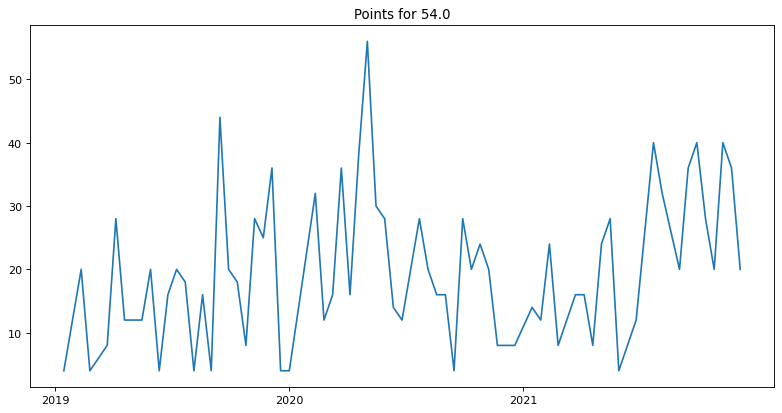

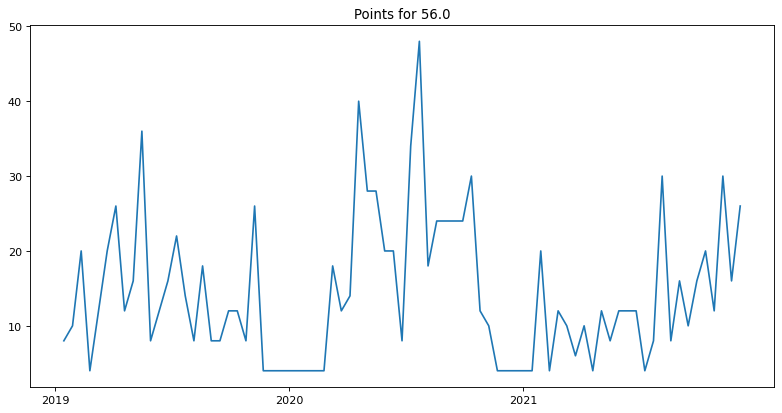

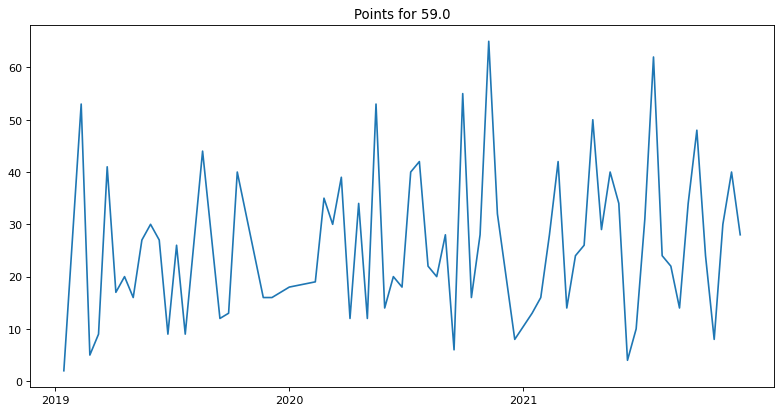

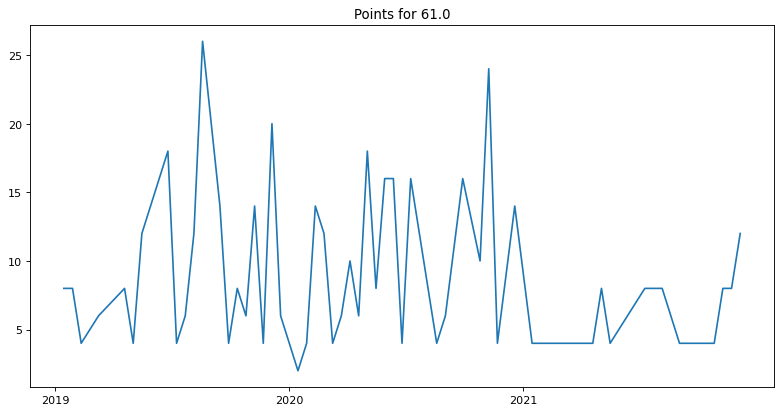

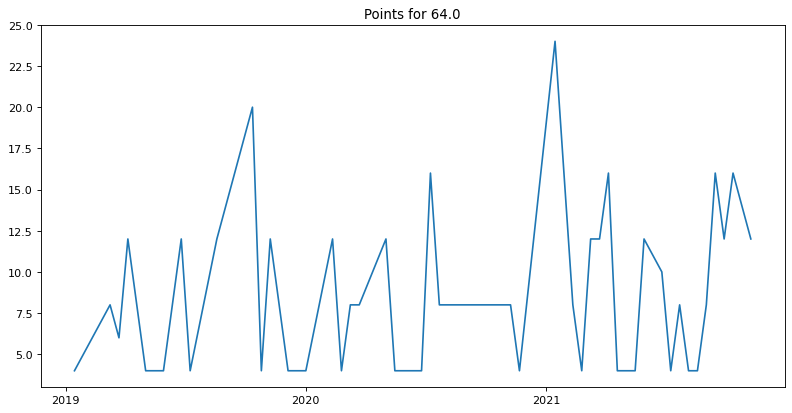

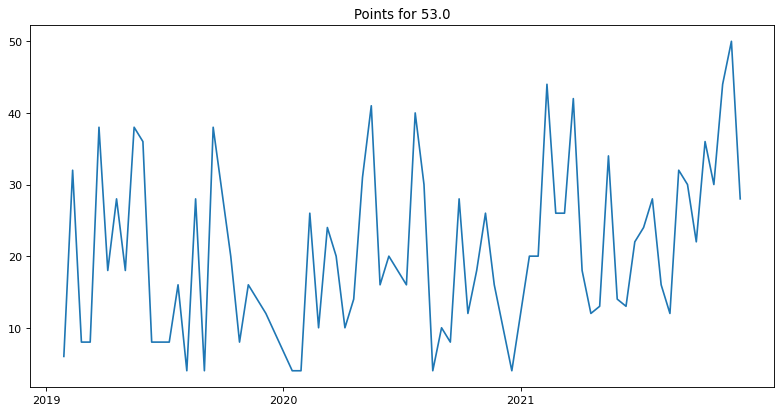

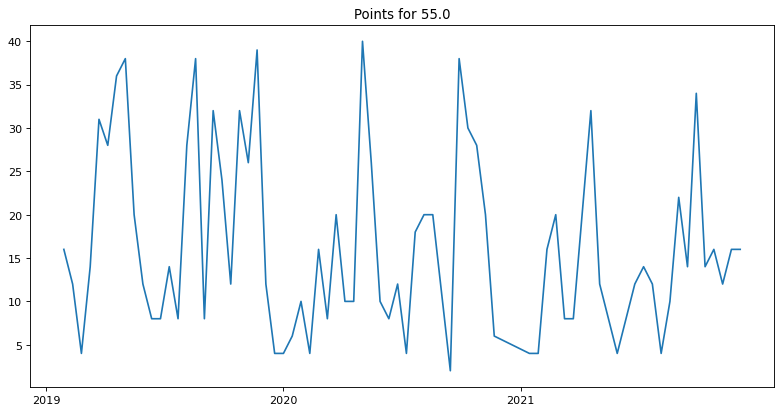

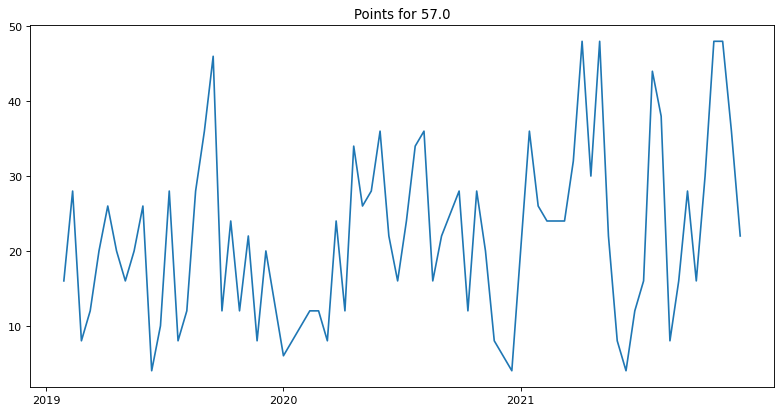

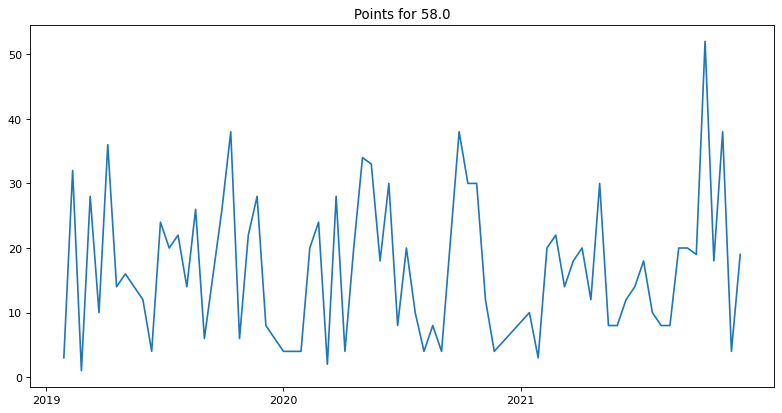

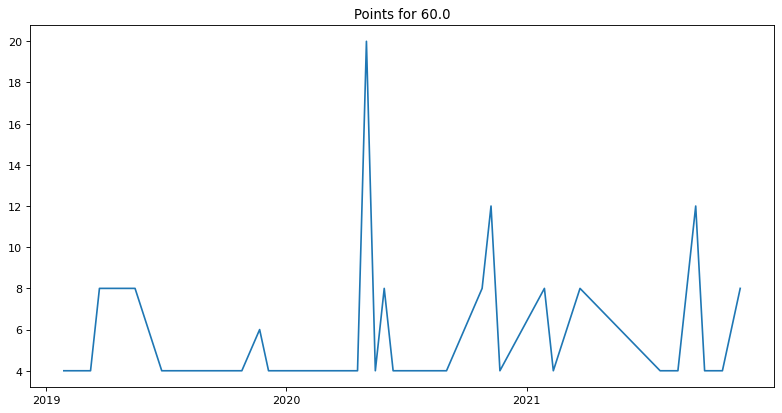

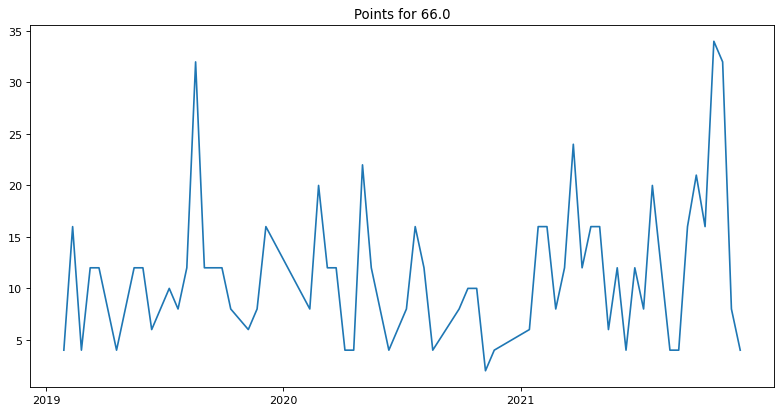

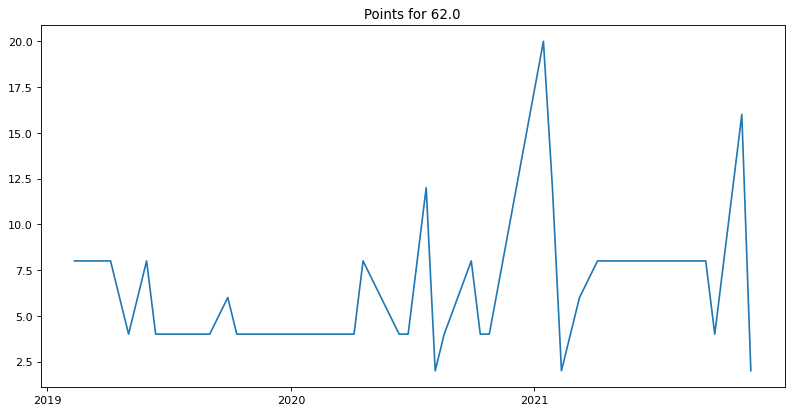

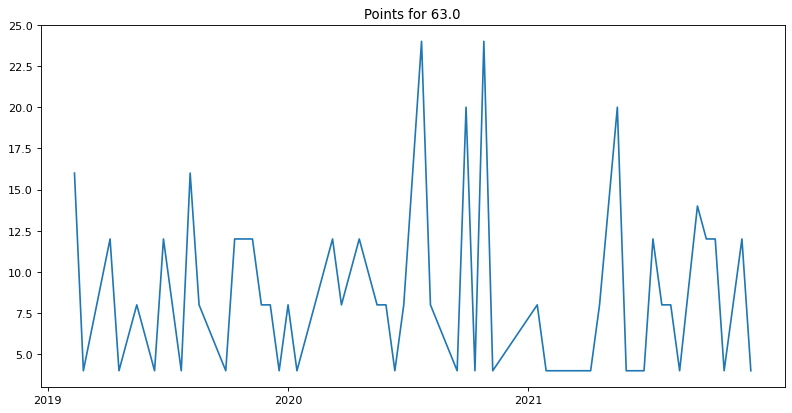

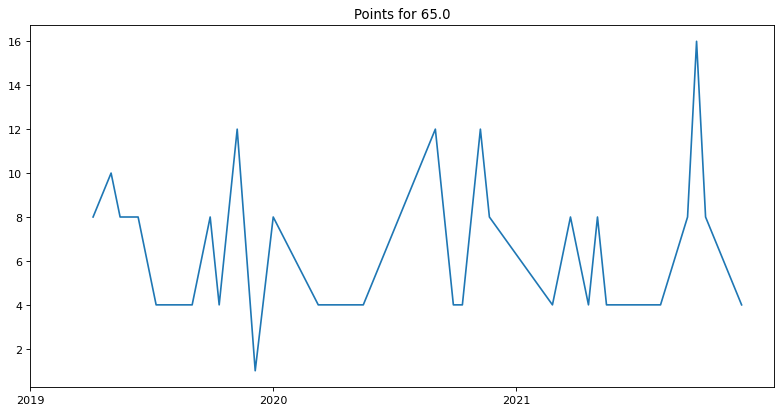

In [138]:
import matplotlib.pyplot as plt
for i in t['PositionId'].unique():
    plt.figure(figsize=(12, 6), dpi=80)
    test = t[t['PositionId'] == i]
    plt.plot('RoundId', 'Points', data=test)
    plt.xticks(np.arange(0,81,27), ('2019', '2020', '2021') )
    plt.title('Points for ' + str(i))
plt.show()